# Data anaylsis using Pandas

## Import necessary libraries

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read Files

In [4]:
Customers = pd.read_csv('Customers.csv', encoding='latin1' , sep=';')
Orders = pd.read_csv('Orders.csv', encoding='latin1' , sep=';')
Location = pd.read_csv('Location.csv', encoding='latin1' , sep=';')
Products = pd.read_csv('Products.csv', encoding='latin1' , sep=';')

## Check first 5 rows from every table

In [5]:
Customers.head()

,Customer ID,Customer Name
0,AA-10315,Alex Avila
1,AA-10375,Allen Armold
2,AA-10480,Andrew Allen
3,AA-10645,Anna Andreadi
4,AB-10015,Aaron Bergman


In [6]:
Orders.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Postal Code,Product ID,Sales,Quantity,Discount,Profit
0,1,CA-2022-152156,08/11/2022,11/11/2022,Second Class,CG-12520,Consumer,42420,FUR-BO-10001798,261.9600,2,0.00,41.9136
1,2,CA-2022-152156,08/11/2022,11/11/2022,Second Class,CG-12520,Consumer,42420,FUR-CH-10000454,731.9400,3,0.00,219.5820
2,3,CA-2022-138688,12/06/2022,16/06/2022,Second Class,DV-13045,Corporate,90036,OFF-LA-10000240,14.6200,2,0.00,6.8714
3,4,US-2021-108966,11/10/2021,18/10/2021,Standard Class,SO-20335,Consumer,33311,FUR-TA-10000577,957.5775,5,0.45,-383.0310
4,5,US-2021-108966,11/10/2021,18/10/2021,Standard Class,SO-20335,Consumer,33311,OFF-ST-10000760,22.3680,2,0.20,2.5164


In [7]:
Location.head()

,Postal Code,City,State,Region,Country/Region
0,76106.0,Fort Worth,Texas,Central,United States
1,53711.0,Madison,Wisconsin,Central,United States
2,68025.0,Fremont,Nebraska,Central,United States
3,77095.0,Houston,Texas,Central,United States
4,75080.0,Richardson,Texas,Central,United States


In [8]:
Products.head()

,Product ID,Category,Sub-Category,Product Name
0,FUR-BO-10000112,Furniture,Bookcases,"Bush Birmingham Collection Bookcase, Dark Cherry"
1,FUR-BO-10000330,Furniture,Bookcases,"Sauder Camden County Barrister Bookcase, Plank..."
2,FUR-BO-10000362,Furniture,Bookcases,Sauder Inglewood Library Bookcases
3,FUR-BO-10000468,Furniture,Bookcases,O'Sullivan 2-Shelf Heavy-Duty Bookcases
4,FUR-BO-10000711,Furniture,Bookcases,"Hon Metal Bookcases, Gray"


## Merge Data

In [10]:
df = Orders.merge(Customers, on='Customer ID', how='outer') \
           .merge(Location, on='Postal Code', how='outer') \
           .merge(Products, on='Product ID', how='outer')

## Check table after merging

In [11]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Postal Code,Product ID,Sales,...,Discount,Profit,Customer Name,City,State,Region,Country/Region,Category,Sub-Category,Product Name
0,1.0,CA-2022-152156,08/11/2022,11/11/2022,Second Class,CG-12520,Consumer,42420.0,FUR-BO-10001798,261.960,...,0.00,41.9136,Claire Gute,Henderson,Kentucky,South,United States,Furniture,Bookcases,Bush Somerset Collection Bookcase
1,8635.0,CA-2023-159793,25/08/2023,29/08/2023,Standard Class,SV-20365,Consumer,19140.0,FUR-BO-10001798,130.980,...,0.50,-89.0664,Seth Vernon,Philadelphia,Pennsylvania,East,United States,Furniture,Bookcases,Bush Somerset Collection Bookcase
2,5400.0,CA-2022-117681,09/04/2022,14/04/2022,Standard Class,HF-14995,Consumer,90004.0,FUR-BO-10001798,556.665,...,0.15,6.5490,Herbert Flentye,Los Angeles,California,West,United States,Furniture,Bookcases,Bush Somerset Collection Bookcase
3,9335.0,CA-2023-110198,01/05/2023,02/05/2023,First Class,AG-10900,Consumer,33065.0,FUR-BO-10001798,314.352,...,0.20,-15.7176,Arthur Gainer,Coral Springs,Florida,South,United States,Furniture,Bookcases,Bush Somerset Collection Bookcase
4,2.0,CA-2022-152156,08/11/2022,11/11/2022,Second Class,CG-12520,Consumer,42420.0,FUR-CH-10000454,731.940,...,0.00,219.5820,Claire Gute,Henderson,Kentucky,South,United States,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10368,1023.0,CA-2021-124450,27/04/2021,03/05/2021,Standard Class,GT-14710,Consumer,20016.0,TEC-MA-10004212,1379.920,...,0.00,648.5624,Greg Tran,Washington,District of Columbia,East,United States,Technology,Machines,Cisco SPA525G2 5-Line IP Phone
10369,1455.0,CA-2022-133711,26/11/2022,29/11/2022,First Class,MC-17425,Corporate,36608.0,TEC-MA-10000010,3040.000,...,0.00,1459.2000,Mark Cousins,Mobile,Alabama,South,United States,Technology,Machines,Hewlett-Packard Deskjet 3050a All-in-One Color...
10370,2267.0,CA-2023-149146,12/10/2023,12/10/2023,Same Day,SM-20320,Home Office,28110.0,OFF-PA-10003919,7.968,...,0.20,2.6892,Sean Miller,Monroe,North Carolina,South,United States,Office Supplies,Paper,Xerox 1989
10371,7642.0,US-2022-157490,06/10/2022,07/10/2022,First Class,LB-16795,Home Office,81001.0,TEC-MA-10001695,703.710,...,0.70,-938.2800,Laurel Beltran,Pueblo,Colorado,West,United States,Technology,Machines,Zebra GK420t Direct Thermal/Thermal Transfer P...


## Comprehensive description of the data

In [12]:
df.shape

(10373, 21)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10373 entries, 0 to 10372
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          10372 non-null  float64
 1   Order ID        10372 non-null  object 
 2   Order Date      10372 non-null  object 
 3   Ship Date       10372 non-null  object 
 4   Ship Mode       10372 non-null  object 
 5   Customer ID     10372 non-null  object 
 6   Segment         10372 non-null  object 
 7   Postal Code     10372 non-null  float64
 8   Product ID      10372 non-null  object 
 9   Sales           10372 non-null  float64
 10  Quantity        10372 non-null  float64
 11  Discount        10372 non-null  float64
 12  Profit          10372 non-null  float64
 13  Customer Name   10372 non-null  object 
 14  City            10373 non-null  object 
 15  State           10373 non-null  object 
 16  Region          10373 non-null  object 
 17  Country/Region  10373 non-null 

In [29]:
df.nunique()

Row ID               1
Order ID          5009
Order Date        1236
Ship Date         1334
Ship Mode            4
Customer ID        793
Segment              3
Postal Code          1
Product ID        1862
Sales             5825
Quantity            14
Discount            12
Profit            7287
Customer Name      793
City               531
State               48
Region               4
Country/Region       1
Category             3
Sub-Category        17
Product Name      1849
dtype: int64

## Checking Nulls and Duplicates

In [18]:
df.isnull().sum().sort_values(ascending=False)

Row ID            0
Discount          0
Sub-Category      0
Category          0
Country/Region    0
Region            0
State             0
City              0
Customer Name     0
Profit            0
Quantity          0
Order ID          0
Sales             0
Product ID        0
Postal Code       0
Segment           0
Customer ID       0
Ship Mode         0
Ship Date         0
Order Date        0
Product Name      0
dtype: int64

In [15]:
df.duplicated().sum()

0

## Handling the missing values

In [19]:
df.dropna(inplace=True)

## Fixing the data types 

In [20]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns

Index(['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')

In [21]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Segment', 'Product ID', 'Customer Name', 'City', 'State', 'Region',
       'Country/Region', 'Category', 'Sub-Category', 'Product Name'],
      dtype='object')

In [22]:
datetime_columns = df.select_dtypes(include=['datetime64']).columns
datetime_columns

Index([], dtype='object')

In [23]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)
df['Row ID'] = pd.Int64Dtype()
df['Postal Code'] = pd.Int64Dtype()

## KPIs

In [27]:
df[numeric_columns].describe()

,Sales,Quantity,Discount,Profit
count,10372.000000,10372.000000,10372.000000,10372.000000
mean,231.667091,3.788083,0.155586,29.043206
std,619.415482,2.226934,0.205694,231.324447
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.480000,2.000000,0.000000,1.770750
50%,55.592000,3.000000,0.200000,8.790600
75%,211.984500,5.000000,0.200000,30.090000
max,22638.480000,14.000000,0.800000,8399.976000


In [31]:
df[['Sales','Profit','Quantity']].agg(['max', 'min','mean','median','sum']).round(2)

,Sales,Profit,Quantity
max,22638.48,8399.98,14.00
min,0.44,-6599.98,1.00
mean,231.67,29.04,3.79
median,55.59,8.79,3.00
sum,2402851.07,301236.13,39290.00


In [78]:
df.groupby(['Category','Sub-Category'])['Sales'].agg(['sum','mean']).sort_values(by=['Category','sum'],ascending=False)

sum         mean
Category        Sub-Category                          
Technology      Phones        357751.9060   385.093548
                Machines      194442.8720  1620.357267
                Accessories   193854.2460   236.119666
                Copiers       150728.0060  2184.463855
Office Supplies Storage       224958.5600   259.767390
                Binders       211632.2250   134.797596
                Appliances    109619.1330   231.263994
                Paper          85751.9440    58.573732
                Supplies       46685.4480   244.426429
                Art            27482.5940    34.139868
                Envelopes      16520.1020    64.784714
                Labels         12536.4320    34.346389
                Fasteners       3029.2800    13.895780
Furniture       Chairs        333014.3430   524.432036
                Tables        207938.6600   647.783988
                Bookcases     127921.4723   535.236286
                Furnishings    98983.8440    96.100819

## Top 10 Products

In [43]:
df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64

In [45]:
df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)

Product Name
Canon imageCLASS 2200 Advanced Copier                                          25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     7753.0390
Hewlett Packard LaserJet 3310 Copier                                            6983.8836
Canon PC1060 Personal Laser Copier                                              4570.9347
Logitech G19 Programmable Gaming Keyboard                                       4492.2978
Plantronics Savi W720 Multi-Device Wireless Headset System                      4492.2978
HP Designjet T520 Inkjet Large Format Printer - 24" Color                       4094.9766
Ativa V4110MDD Micro-Cut Shredder                                               3772.9461
3D Systems Cube Printer, 2nd Generation, Magenta                                3717.9714
Ibico EPK-21 Electric Binding System                                            3345.2823
Name: Profit, dtype: float64

## Visual

In [61]:
df['Order Month'] = df['Order Date'].dt.to_period('M').astype(str)
df['Order Year'] = df['Order Date'].dt.year

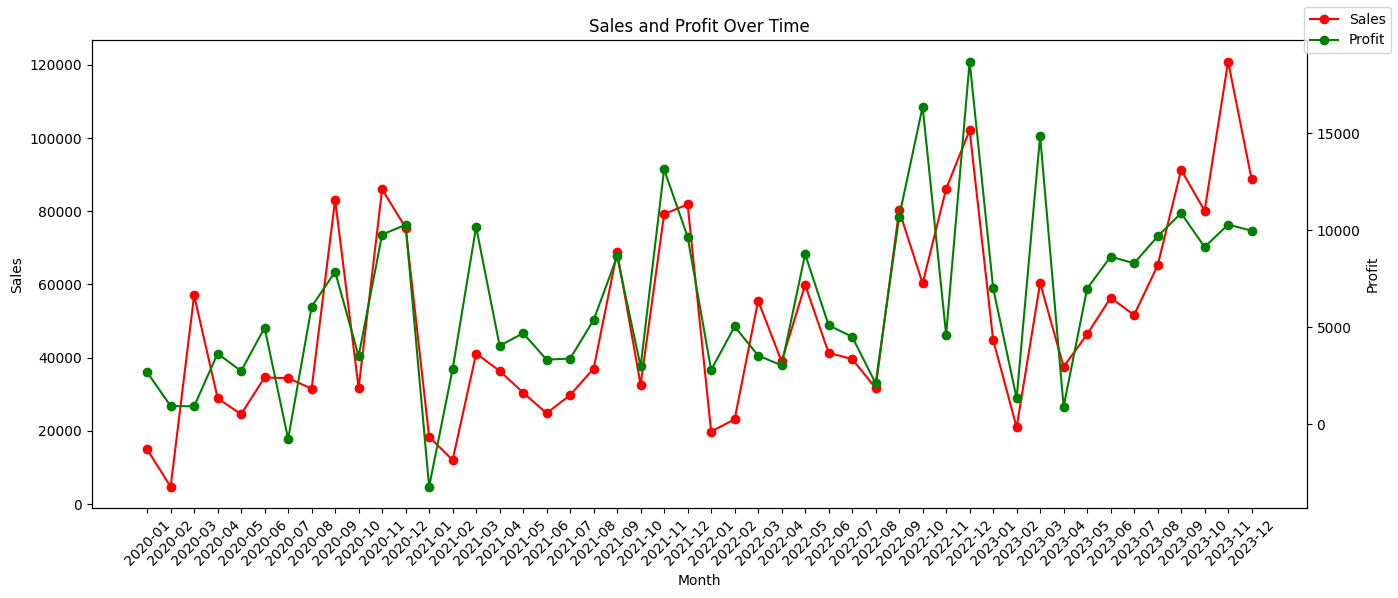

In [63]:
monthly = df.groupby('Order Month')[['Sales', 'Profit']].sum().reset_index()
fig, ax1 = plt.subplots(figsize=(14, 6))

ax1.set_title("Sales and Profit Over Time")
ax1.set_xlabel("Month")
ax1.set_ylabel("Sales", color='black')
ax1.plot(monthly['Order Month'], monthly['Sales'], color='red', marker='o', label='Sales')
ax1.tick_params(axis='y', labelcolor='black')
ax1.tick_params(axis='x', rotation=45)

ax2 = ax1.twinx()
ax2.set_ylabel("Profit", color='black')
ax2.plot(monthly['Order Month'], monthly['Profit'], color='green', marker='o', label='Profit')
ax2.tick_params(axis='y', labelcolor='black')

fig.legend()
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


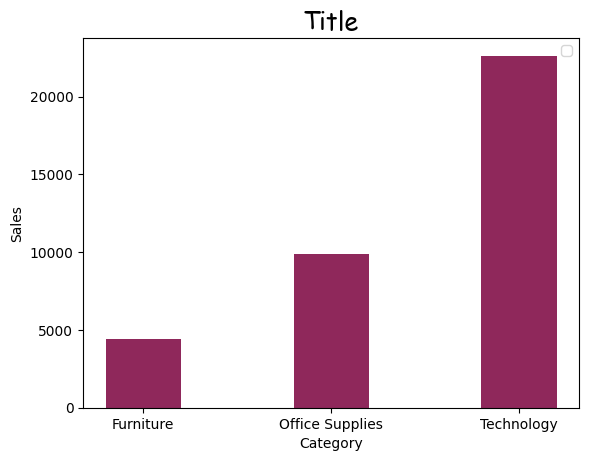

<Figure size 640x480 with 0 Axes>

In [74]:
plt.title("Title", fontdict={'fontname': 'Comic Sans MS', 'fontsize': 18})
plt.xlabel("Category")
plt.ylabel("Sales")
plt.bar(df.Category,df.Sales, color = "#8f285b" ,  width=0.4)
plt.legend(loc = "upper right" , ncol = 2)
plt.plot()
plt.show()
plt.savefig("first.jpg" ,dpi = 500)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


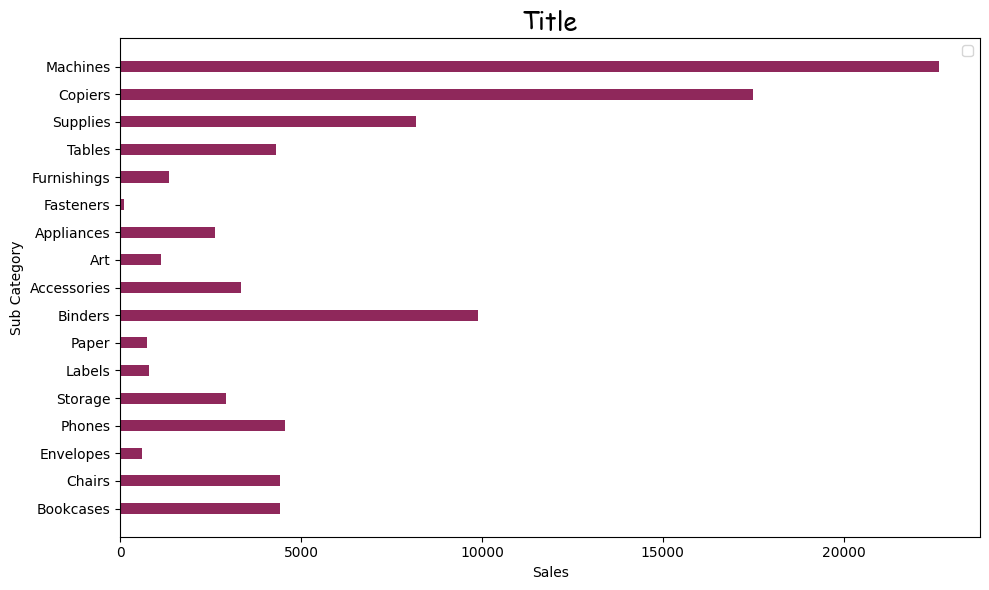

In [75]:
plt.figure(figsize=(10, 6))
plt.barh(df['Sub-Category'], df.Sales, color="#8f285b", height=0.4)
plt.title("Title", fontdict={'fontname': 'Comic Sans MS', 'fontsize': 18})
plt.xlabel("Sales")
plt.ylabel("Sub Category")
plt.legend(loc="upper right", ncol=2)

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


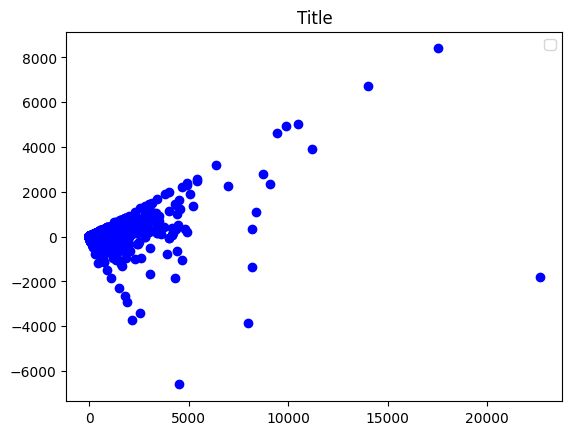

In [76]:
plt.scatter(df.Sales, df.Profit, color='blue', marker='o')
plt.title("Title")
plt.legend()
plt.show()